In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
X = np.empty([100,2])  # 2个特征
X[:,0] = np.random.uniform(0.,100.,size = 100)
X[:,1] = 0.75*X[:,0]+3.+np.random.normal(0,10.,size = 100)  #

In [38]:
def demean(X):
    return X-np.mean(X,axis=0)  # 均值变为0  
X = demean(X)

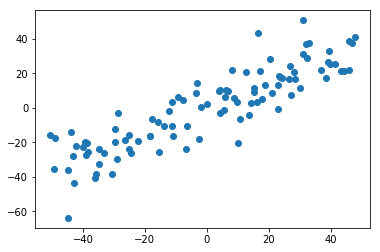

In [39]:
plt.scatter(X[:,0],X[:,1])

In [40]:
def f(w,X):
    return np.sum((X.dot(w)**2))/len(X)

def df(w,X):  # 梯度
    return X.T.dot(X.dot(w))*2./len(X)

def direction(w):  # 将该向量转化为单位向量
    return w / np.linalg.norm(w)  # np.linalg.norm(w) 求向量的模。

def first_component(X,initial_w,eta,n_iters = 1e4,epsilon = 1e-8):
    
    w = direction(initial_w)
    cur_iter = 0
    while cur_iter<n_iters:
        gradient = df(w,X)
        last_w = w
        w = w+eta+gradient
        w = direction(w)  # 注意1：每次求一个单位向量
        if (abs(f(w,X)-f(last_w,X))< epsilon):
            break
        cur_iter +=1
    return w

In [41]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X,initial_w,eta)
w

array([0.78723944, 0.61664744])

In [42]:
X2 = np.empty(X.shape)
X2.shape

(100, 2)

In [44]:
# for i in range(len(X)):
#     X2[i] = X[i]-X[i].dot(w)*w

X2 = X -X.dot(w).reshape(-1,1)* w    # 减去分量 !!!!!!!

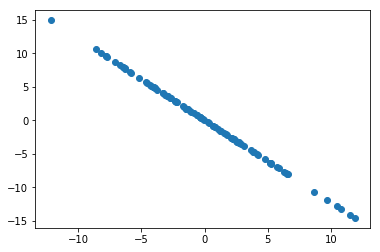

In [32]:
plt.scatter(X2[:,0],X2[:,1])

In [33]:
w2 = first_component(X2,initial_w,eta)
w2  # 和老师的方向相反 和相同，两个方向

array([ 0.63230546, -0.77471918])

In [34]:
w.dot(w2)

0.00012277110869707286

In [45]:
def first_n_components(n,X,eta = 0.01,n_iters = 1e4,epsilon = 1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca,initial_w,eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1,1)*w
    return res

In [46]:
first_n_components(2,X)

[array([0.78723946, 0.61664742]), array([-0.61657205,  0.78729849])]

In [47]:
# test 
a = np.arange(4).reshape(2,2) # 矩阵
a

array([[0, 1],
       [2, 3]])

In [51]:
b = np.array([1,2])  # 向量
b.ndim

1

In [50]:
a-b  # 按行减

array([[-1, -1],
       [ 1,  1]])

In [52]:
a-b.reshape(-1,1)  # 两者不一样，  按列减

array([[-1,  0],
       [ 0,  1]])

In [53]:
a = np.arange(6).reshape(3,2)
a

array([[0, 1],
       [2, 3],
       [4, 5]])

In [54]:
b = np.array([1,2,3])
b

array([1, 2, 3])

In [55]:
a-b  # 矩阵减向量，只能按行减

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [59]:
c = b.reshape(-1,1)
c 

array([[1],
       [2],
       [3]])

In [60]:
a-c  #  矩阵-矩阵 优先按列

array([[-1,  0],
       [ 0,  1],
       [ 1,  2]])

In [61]:
c = np.array([[1,2,]])
c

array([[1, 2]])

In [64]:
a-c  # 也可以按行

array([[-1, -1],
       [ 1,  1],
       [ 3,  3]])

In [65]:
d = np.array([[2],[3]])
d

array([[2],
       [3]])

In [66]:
e = np.array([2,3])
e

array([2, 3])

In [67]:
d*e

array([[4, 6],
       [6, 9]])

In [68]:
a = np.arange(18).reshape(6,3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17]])

In [69]:
b = np.array([[3],[2],[1]])
b

array([[3],
       [2],
       [1]])

In [70]:
a-b

ValueError: operands could not be broadcast together with shapes (6,3) (3,1) 

In [71]:
a=np.arange(2).reshape(1,-1)
a

array([[0, 1]])

In [73]:
b = np.array([1,2])
b

array([1, 2])

In [74]:
a-b

array([[-1, -1]])

In [75]:
a*b

array([[0, 2]])

In [76]:
a =np.arange(4).reshape(2,2)
a

array([[0, 1],
       [2, 3]])

In [77]:
b

array([1, 2])

In [78]:
a*b  # 按行乘

array([[0, 2],
       [2, 6]])

In [79]:
a.dot(b)

array([2, 8])

In [80]:
d = np.array([[2],[3]])
d

array([[2],
       [3]])

In [82]:
a = np.array([1,2])
a

array([1, 2])

In [83]:
d.dot(a)

ValueError: shapes (2,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

In [85]:
a = np.array([[1,2]])
a

array([[1, 2]])

In [86]:
b

array([1, 2])

In [87]:
a.dot(b)

array([5])

In [88]:
a

array([[1, 2]])

In [89]:
b = np.array([[1],[3]])
b

array([[1],
       [3]])

In [90]:
a.dot(b)

array([[7]])